<img src="dsi.png" style="height:128px;">


# Lesson 1: Why Data Science?

Welcome to the interactive Jupyter Notebook-based component of Data Science for India! Each week, we're going to practice what we covered in the worksheets with *programs* on the computer. We talked a lot about how computers are useful when working with data, so let's close out today's session with an example.

Today we're going to look at some data, and how we can *visualize* it! Along the way, we'll learn about Jupyter Notebooks and how to use them. In this notebook, you will also see some lines of *code*. Code is something that a machine can understand and *interpret*, or make sense of. 

Just like you know how to speak English or Hindi, you'll soon know how to write code in a language called Python. Python is just one of the many languages computers can understand! For today, you won't need to write any code unless you are curious and want to play around (go ahead!). Instead, just look at a few of the cool things we can do with data science.

Run each "cell", or block of code, by pressing the keys "Shift" and "Enter" at the same time. 

In [1]:
# Below we have `import` statements, which help us set up the notebook! 
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Some lines of code are equal to a value. In Jupyter notebooks, we actually get to see what the result of the last line of code is equal to.

Here, we're going to read a *table* of data about the quality of different bodies of water all over India. You might recognize some of these rivers and lakes. In fact, you might have even been there!


The *rows* (displayed sideways) of the table represent the location where the measurements were taken, and the *columns* (displayed vertically), show the different types of measurements. You might even recognize some from chemistry class.

In [2]:
water = Table().read_table("water_quality.csv")
water

Station Code,Water Quality,Locations,State Name,TEMPERATURE (degree Centigrade)-Minimum,TEMPERATURE (degree Centigrade)-Maximum,TEMPERATURE (degree Centigrade)-Mean,Dissolved Oxygen(D.O.) (mg/l)-Minimum,Dissolved Oxygen(D.O.) (mg/l)-Maximum,Dissolved Oxygen(D.O.) (mg/l)-Mean,pH-Minimum,pH-Maximum,pH-Mean,CONDUCTIVITY (µmhos/cm)-Minimum,CONDUCTIVITY (µmhos/cm)-Maximum,CONDUCTIVITY (µmhos/cm)-Mean,Biochemical oxygen demand (B.O.D.) (mg/l)-Minimum,Biochemical oxygen demand (B.O.D.) (mg/l)-Maximum,Biochemical oxygen demand (B.O.D.) (mg/l)-Mean,NITRATE- N+ NITRITE-N (mg/l)-Minimum,NITRATE- N+ NITRITE-N (mg/l)-Maximum,NITRATE- N+ NITRITE-N (mg/l)-Mean,FECAL COLIFORM (MPN/100ml)-Minimum,FECAL COLIFORM (MPN/100ml)-Maximum,FECAL COLIFORM (MPN/100ml)-Mean,TOTAL COLIFORM (MPN/100ml)-Minimum,TOTAL COLIFORM (MPN/100ml)-Maximum,TOTAL COLIFORM (MPN/100ml)-Mean
1001,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT UPSTREAM MANALI""","""HIMACHAL PRADESH""",2.5,14,9,8.4,10.3,9,7.2,8,8,68,101,85,0.1,0.3,0.1,0.06,0.42,0.2,0,920,106,11,2400,397
1002,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT DOWNSTREAM KULU""","""HIMACHAL PRADESH""",5.6,14,10,8,10.2,9,7.1,8.3,8,69,165,102,0.2,0.4,0.3,0.04,0.89,0.4,33,350,153,160,2400,954
1003,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT DOWNSTREAM AUT""","""HIMACHAL PRADESH""",5,14.1,11,8.2,10.5,9,7.3,8.5,8,65,178,96,0.1,0.5,0.2,0.04,0.64,0.3,2,140,58,27,2400,653
1004,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT UPSTREAM PANDON DAM""","""HIMACHAL PRADESH""",5.5,18,13,8.1,10.6,9,7,8.2,8,56,130,94,0.1,0.2,0.2,0.24,0.71,0.4,7,79,34,34,920,317
1005,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE""","""HIMACHAL PRADESH""",5,21,14,7.9,12,10,7.3,8.4,8,56,227,112,0.1,0.4,0.2,0.08,0.69,0.5,23,920,213,160,2400,1072
1550,"""WATER QUALITY OF RIVER- BEAS""","""UPSTREAM MANDI""","""HIMACHAL PRADESH""",6,20,16,7.1,11.1,9,7.2,8.7,8,66,164,117,0.1,0.4,0.2,0.01,1.39,0.5,17,350,100,220,2400,722
1006,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT DOWNSTREAM MANDI""","""HIMACHAL PRADESH""",6.5,21,16,7.8,10.3,9,7.4,8.4,8,86,220,155,0.2,0.6,0.5,0.08,1.53,0.7,27,920,445,540,2400,1855
2604,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT DOWNSTREAM JAISINGHPUR""","""HIMACHAL PRADESH""",8.9,22,19,7.8,9,8,7.5,8.7,8,97,361,211,0.2,0.8,0.5,0.15,1.46,0.5,4,11,7,22,170,72
1007,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT DOWNSTREAM ALAMPUR""","""HIMACHAL PRADESH""",20,22,19,8.3,9.1,8,8.2,8.9,8,130,356,202,1,1,0.6,0.1,1.18,0.4,6,14,9,94,280,123
1008,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT DOWNSTREAM DEHRAGOPIPUR""","""HIMACHAL PRADESH""",9,24,19,7.5,9.6,8,7.1,8.4,8,124,638,280,0.1,1.1,0.7,0,7.07,1.1,0,21,10,12,540,157


Of course, the Jupyter notebook won't show us *all* the data points. Let's see how many locations were part of the survey. 

To give us a little bit more information, let's look at the states where data was taken.

In [24]:
print("Data was taken at " + str(water.num_rows) + " locations" + " in " +
      str(water.group("State Name").num_rows) + " states.")

Data was taken at 1714 locations in 32 states.


Let's see if we can figure out some information about the temperature of the water from each state. Because there were multiple sites in each state, we need to find the value that's most representative of data from the entire state.
Thus, we'll take the *average* of each column. The *average*, or *mean*, is a number that represents the center of a group of numbers. We can now *visualize* this data with a *bar graph*.

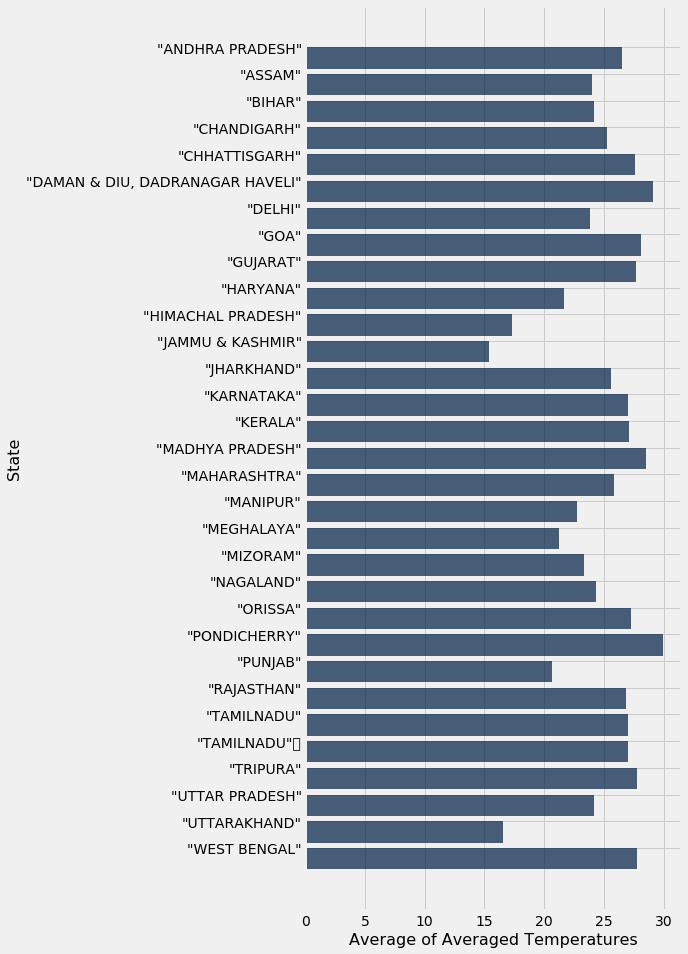

In [27]:
grouped = water.where(water.column(6), lambda x : x == x).group("State Name", np.average)
temperatures = Table().with_columns("State", grouped.column(0),
                                   "Average of Minimum Site Temperatures", grouped.column(4),
                                   "Average of Maximum Site Temperatures", grouped.column(5),
                                   "Average of Averaged Site Temperatures", grouped.column(6))
temperatures.barh("State", "Average of Averaged Site Temperatures")

Let's now do something with some other columns in the table. The table also contains information on the amount of coliform bacteria detected in the water. This is extrememly important to know, beacause it shows that some sites have more germs than others and where you're more likely to get sick as a result of using the water without purifying it before. <-change wording, awk.

In [46]:
temp_clean = water.where(water.column(6), lambda x: x == x)
tbl = temp_clean.where(temp_clean.column(9), lambda x: x == x)

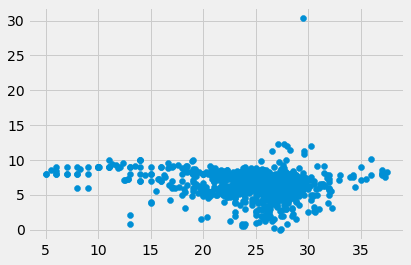

In [47]:
plt.scatter(tbl.column(6), tbl.column(9))